<a href="https://colab.research.google.com/github/AlexandraJMV/ADA-Informes/blob/main/Informe_RadixSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***RadixSort***

## **Problema: Ordenamiento de una secuencia de números**
---

En general, un problema de ordenamiento para *n elementos numéricos* se puede describir de la siguiente forma:

>**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$
>
>**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

Buenas soluciones para problemas de ordenamiento son fundamentales para la optimización de otros procediminetos como por ejemplo la búsqueda binaria, algoritmo que depende de un arreglo ordenado de valores para poder implementarse.



## Descripción del algoritmo
Todos los algoritmos vistos anteriormente han basado su ordenamiento en comparaciones de valores. Esto implica que el mejor caso posible para cada uno *(QuickSort, MergeSort, etc..)* siempre será de orden $O(n\cdot logn)$, dado a que se ha calculado que este es el mínimo de comparaciones a hacer para cubrir todos los elementos.

Sin embargo, existen otros algoritmos capaces de ordenar en un tiempo lineal $O(n)$ o bien muy próximos a ser lineales.

***RadixSort*** es uno de estos algoritmos

El ordenamiento realizado por *RadixSort* es similar a ordenar por cierta cantidad de categorias una a la vez. La idea de este algoritmo es ir ordenando los valores de de una lista de números dígito a dígito, llendo de dígitos de menor importancia a mayor. 

<img src="https://ds055uzetaobb.cloudfront.net/brioche/uploads/IEZs8xJML3-radixsort_ed.png?width=1200" alt="counting sort example">

Al comparar los dos valores $156$ y $321$ es claro que el valor que representa un mayor diferencia a la hora de ordenar los elementos son $1$ y $3$.

También se pueden realizar ordenamientos con *RadixSort* a partir del elemento de mayor importancia, siempre y cuando el sub-proceso que ordene por dígito sea estable.

El funcionamiento es el siguiente:
1. Se obtiene el mayor valor del arreglo a ordenar $A$, con tal de tener un límite de cuantas iteraciones se realizarán más adelante.

2. Se itera desde $10^d$ donde $d$ inicia en $0$ y termina cuando, al dividir el máximo valor por este número, se obtiene un $0$

3. Por cada iteración realizada se aplica el algoritmo *CountingSort*. A diferencia del *CountingSort* habitual, este es capaz de realizar el ordenamiento según los dígitos en alguna posición específica.

El pseudo-código es bastante simple:

```
RadixSort(A)
    Para d=1 a k, siendo k el máximo de dígitos:
        Ordenar A según el digito en posición d

```

Es **fundamental** que el sub-proceso que ordena el arreglo según el $d-ésimo$ elemento sea estable, es decir, que respete el orden de los elementos de entrada pues queremos que el arreglo termine siendo ordenado considerando todos sus dígitos, no solo uno. 

<img src='https://ds2-iiith.vlabs.ac.in/exp/radix-sort/analysis/images/stable.png' alt='stable vs unstable'>

Por ejemplo:

El arreglo $A=[123,139,211,300]$ se encuentra ordenado según el primer dígito (izquierda a derecha). Sin embargo, en las primeras dos posiciones, los elementos no se encuentran ordenados puesto a que $123 < 139$

Fuese el sub-proceso no estable es posible que uno se encuentre en alguna situación de este estilo, pues el ordenamiento por dígito considera, obviamente, solamente el dígito.


## CountingSort
CouningSort es un algoritmo de ordenamiento que asume que todos los elementos a ordenar se encuentran en un rango de $[0...k]$, siendo $k$ el mayor valor del arreglo a ordenar.

Al algoritmo funciona de la siguiente forma:
1. Se crea un arreglo $C$ con $[0..k]$ elementos, cada posición corresponderá a la cantidad de elementos menores o iguales a $k$.

2. Se recorre el arreglo a ordenar $A$ desde el final, colocando cada elemento leído en la posición que le corresponde en $B$ a través del arreglo $C$.

3. Por cada elemento insertado, se le debe restar uno al contador en $C$, para no insertar elementos iguales en una misma posición.

Miremos el ejemplo:

<img src="https://cdn.programiz.com/cdn/farfuture/tcfjQdeYwL_jETOCPZxNjIXbysRrb7MaG6PwO2MzHnM/mtime:1582112622/sites/tutorial2program/files/Counting-sort-4_1.png" alt='Funcionamiento counting sort'>

###### fuente:https://www.programiz.com/dsa/counting-sort

1. Se 'lee' el término $4$ y se busca en el arreglo $C$.
2. Se observa como existen 6 elementos iguales o menores a $4$. Se inserta el elemento en la posición $6-1$


### Código de CountingSort

La función recibe dos parámetros.
1. $A[0..n]$, siendo el arreglo a ordenar.
3. $k$ como el valor del mayor elemento.

Además se agrega el parámetro `Verbose` quien puede tomar los valores `True` o `False`, con tal de visualizar el funcionamiento de la función.

Al finalizar ejecución, ***CountingSort*** retorna un arreglo $B$, con los elementos ordenados.


In [24]:
def counting_sort(A,k, verbose=False):
    len_a = len(A)
    C=[0] * (k+1)  # Creación array C
    B = [0] * len_a # Creacion arreglo de salida
    
    if verbose==True:
        print(f"Input = {A}")
        print(f"Empthy C: {C}\n")
    
    for j in range(0,len_a):  # Conteo de repeticiones
        C[A[j]] = C[A[j]] + 1
    if verbose==True:
        print(f"Conteo en C: {C}")

    for m in range(1,k+1): # Acumulación de repeticiones
        C[m] = C[m]+C[m-1]

    if verbose==True:
        print(f"C acumulado : {C}\n")

    for n in range(len_a-1,-1,-1):  # Inserción de elementos en B

        if verbose==True:
            print(f"Insercion {len_a - n}\n")
            print(f"A: {A}")
            print(f"C : {C}\n")
            print(f"Se inserta el valor {A[n]} en la posicion {C[A[n]]}!")

        B[C[A[n]]-1] = A[n]
        C[A[n]] = C[A[n]]- 1

        if verbose==True: print(f"Arreglo de salida = {B}\n")

    if verbose==True: print(f"Arreglo Ordenado!\nB = {B}")
    return B

In [193]:
# Ejemplo
def max(A):
    max = -1
    for i in A:
        if i>max:
            max=i
    return max

from random import choices
A = choices(range(0,10), k = 4)
A

[5, 4, 1, 6]

In [194]:
counting_sort(A,max(A), verbose = True)

Input = [5, 4, 1, 6]
Empthy C: [0, 0, 0, 0, 0, 0, 0]

Conteo en C: [0, 1, 0, 0, 1, 1, 1]
C acumulado : [0, 1, 1, 1, 2, 3, 4]

Insercion 1

A: [5, 4, 1, 6]
C : [0, 1, 1, 1, 2, 3, 4]

Se inserta el valor 6 en la posicion 4!
Arreglo de salida = [0, 0, 0, 6]

Insercion 2

A: [5, 4, 1, 6]
C : [0, 1, 1, 1, 2, 3, 3]

Se inserta el valor 1 en la posicion 1!
Arreglo de salida = [1, 0, 0, 6]

Insercion 3

A: [5, 4, 1, 6]
C : [0, 0, 1, 1, 2, 3, 3]

Se inserta el valor 4 en la posicion 2!
Arreglo de salida = [1, 4, 0, 6]

Insercion 4

A: [5, 4, 1, 6]
C : [0, 0, 1, 1, 1, 3, 3]

Se inserta el valor 5 en la posicion 3!
Arreglo de salida = [1, 4, 5, 6]

Arreglo Ordenado!
B = [1, 4, 5, 6]


[1, 4, 5, 6]

Para la  impelentación de `RadixSort`, es necesario modificar ligeramente la función `CountingSort` para que pueda realizar un el ordenamiento a través de 'trozos' o la posición del un dígito de algún número, en lugar del número completo.

Esta segunda implementación reescribe los elementos ordenados en el original para que se mantenga el orden dentro de cada iteración de `RadixSort` y recibe los siguientes parámetros.

1. El arreglo $A$ a modificar.
2. $fr$, siendo el número por el cual se dividirán los elementos para obtener el valor deseado. Por ejemplo, para obtener el valor $4$ en 1243 es necesario dividir el valor en $10$, para luego obtener el módulo al dividir en 10 nuevamente.
    > 1243 // 10 `->`  124 % 10 `->` 4
    
    Es, en la siguiente implementación, una potencia de 10

Y funciona de manera similar al CountingSort regular, con la diferencia de que el arreglo $C$ que contendrá los dígitos solo necesitará 10 posiciones para cubrir todas las posibilidades y la obtención de la posición de cierto número se sacará con el procedimiento explicado anteriormente (Para obtener $4$ desde $1243$)

In [170]:
def radix_counting_sort(A, fr, verbose = False):
    len_a = len(A)
    B = [0] * len_a     # Creacion arreglo ordenado
    C = [0] * 10        # Al ser un solo digito, C contendra los valores de 0 a 9

    for j in range(0, len_a): # Conteo de elementos segun resto
        i = A[j] // fr    # Obtencion de digito en posicion
        C[i % 10] += 1

    if verbose==True:
        print(f"C conteo :{C}")

    for j in range(1, 10):    # Acumulacion de conteos
        C[j] += C[j - 1]
    
    if verbose==True:
        print(f"C acumulado :{C}\n")

    for j in range(len_a-1 , -1, -1): # Insercion de elementos ordenados en B
        i = A[j] // fr

        if verbose==True:
            print(f"Se inserta {A[j]} en la posicion {C[i % 10]-1}!")
            print(f"Se disminuye C[{i % 10}] en un digito!")
            print(f"{C[i % 10]}  -> {C[i % 10]-1}\n")

        B[C[i % 10] - 1] = A[j]
        C[i % 10] -= 1

    for i in range(0, len_a):  # Insercion de ordenamiento en  arreglo original
        A[i] = B[i]


### Analisis CountingSort

#### ***Correctitud***
Para realizar la correctitud de `CountingSort` se utilizará la inducción.

##### ***Hipótesis.***
`CountingSort` recibe un arreglo A de n elementos, retornando el arreglo ordenado de forma que $a_1≤a_2≤...≤a_n$

##### ***Caso base:***
Cuando $n=1$, el arreglo se encuentra trivialmente ordenado.

##### ***Paso inductivo:***

Para un arreglo de $n$ elementos se realizará el conteo y acumulación de valores en el rango $[0... k]$

Luego, se recorre el arreglo $A$ desde el final para insertar los elementos en su posición correspondiente.

Para cada iteración $i$ del recorrido de $A$, se realizará lo siguiente: 
* Se accede al valor $C[A[i]]$, que corresponderá a la suma de los valores menores o iguales a $A[i]$.

Esto quiere decir que para $A[i]$ existen $C[A[i]]-1$ números que deben ser posicionados antes de $A[i]$. $C[A[i]]$ resulta ser la posición final del valor. Luego, se le resta una unidad a  $C[A[i]]$, con tal de evitar la superposición de valores repetiddos.

Al finalizar el recorrido de $A$, todos los elementos habrán sido insertados en su posición correcta.

#### ***Tiempo de ejecucion***
Generalmente, conviene utilizar counting sort cuando se tiene que $k = O(n)$, puesto a que es en este caso que el tiempo de ejecución es lineal.

Sin embargo, este puede no ser siempre el caso.

Analizando las distintas operaciones realizadas por el algoritmo tenemos la siguiente función representando el tiempo de ejecución de CountingSort:

$T(n) = O(1) +  O(k) + 2 \cdot O(n)$

Siendo $O(1)$ la creación del arreglo $C$, $O(k)$ el costo por rellenar de O en arreglo $C$ y $2\cdot O(n)$ el costo del conteo e inserción.

#### ***Estabilidad***

Para la estabilidad de `CountingSort` hay que ver su funcionamiento. 

Imaginemos que existen dos valores $a_1$ y $a_2$ de igual valor $a = A[i]$ , y que $a_1$ se encuentra colocado antes de $a_2$ en el arreglo $A$.

Al realizar la lectura e inserción de elementos desde $[len(a)..0]$, el primer elemento que sería leído e insertado es $a_2$.

Asumiendo que esta es una primera inserción de algún elemento de valor $a$, se colocaría en la posición $C[A[i]]$ , correspondiente a la cantidad de los elementos que le preceden, y se restaría una unidad a $C[A[i]]$.

Una vez se lea nuevamente un valor $a$, $a_1$ (Que se encuentra en un índice de menor valor como se indicó anteriormente) se insertará en un valor de $C[]$ menor al anterior. Ya que $C[A[i]]$ jamás aumenta, esto se mantiene para cualquier cantidad de elementos $a$ insertados.

Por lo tanto, `CountingSort` es estable. <br><br>



---



## Ejemplo de RadixSort

Consideremos el siguiente arreglo:

$A=[19,63,53,70]$

Para la primera pasada, se realizará el ordenamiento según el primer dígito *(de derecha a izquierda*)

`counting sort 1`

Se ordenan los elementos a partir del dígito en la primera posición (de derecha a izquierda)

Se realiza el conteo y suma de elementos:

$C=[0,0,0,0,0,0,0,0,0,0]$

$C=[1,0,0,2,0,0,0,0,0,1]$

$C=[1,1,1,3,3,3,3,3,3,4]$

Se recorre el arreglo A desde el final insertando los elementos como  correponda.

Inserciones:
1. 70, `0 -> se inserta en la posición 1-1, se resta 1 a C[0]`
2. 53, `3 -> se inserta en la posicion 3-1, se resta 1 a C[3]`
3. 63, `3 -> se inserta en la posicion 2-1, se resta 1 a C[3]`
4. 19, `9 -> se inserta en la posicion 4-1, se resta 1 a C[9]`

Arreglo B, conteniendo los cambios de posición:
$B = [70, 63, 53, 19]$

Y se reescriben estos resultados en A.

Nótese cómo, al hacer la inserción de elementos, aún existiendo dos elemetos siendo ordenados por el valor $3$, han mantenido el orden original. Esto significa que counting sort es un algoritmo **estable**.


`counting sort 2`

Se ordenan los elementos a partir del dígito en la segunda posición. 

Ahora, el arreglo A es $[70, 63, 53, 19]$

Se realiza el conteo y suma de elementos:

$C=[0,0,0,0,0,0,0,0,0,0]$

$C=[0,1,0,0,0,1,1,1,0,0]$

$C=[0,1,1,1,1,2,3,4,4,4]$

Se recorre el arreglo A desde el final insertando los elementos en $B$ como  correponda.

Inserciones:
1. 19, `1 -> se inserta en la posición 1-1, se resta 1 a C[1]`
2. 53, `5 -> se inserta en la posicion 2-1, se resta 1 a C[5]`
3. 63, `6 -> se inserta en la posicion 3-1, se resta 1 a C[6]`
4. 70, `7 -> se inserta en la posicion 4-1, se resta 1 a C[7]`

Arreglo B, conteniendo los cambios de posición:
$B = [19, 53, 63, 70]$

Y se reescriben estos resultados en A.

` fin `

Y con esto se ha ordenado el arreglo $A=[19,63,53,70]$ a $A = [19, 53, 63, 70]$  utilizando `RadixSort`.





## Código
`RadixSort` acepta 2 argumentos:
1. El arreglo A a ordenar
2. El parámetro `verbose`, para la impresión paso a paso.


In [187]:
from math import log10

def radixSort(A, verbose = False):
    maximo = max(A)   # Obtener el elemento maximo

    if verbose==True:
        print(f"Arreglo de entrada : ")
        print(f"{A}\n")
        print(f"Maximo elemento del arreglo: {maximo}\n")
        print("-------------------------------------------------------------------")
    

    dig = 1
    cont = 1
    while maximo // dig > 0:

        if verbose==True:
            print(f"Pasada {cont}\n")
            print(f"Counting sort (radix) {cont}")
            print(f"\nOrdenando digitos en la {int(log10(dig)+1)} posicion:")

        radix_counting_sort(A, dig, verbose = verbose)

        if verbose==True:
            print(f"Resultado : {A}\n")
            print("-------------------------------------------------------------------")

        dig *= 10
        cont += 1
    
    if verbose==True:
        print("\nArreglo ordenado.")
        print(A)

from random import choices

A = choices(range(0,299), k = 15)
A

[251, 179, 289, 115, 258, 96, 228, 13, 65, 13, 236, 7, 118, 146, 71]

In [188]:
radixSort(A)
A

[7, 13, 13, 65, 71, 96, 115, 118, 146, 179, 228, 236, 251, 258, 289]

### Ejemplo paso a paso `verbose = True`


In [189]:
from random import choices

A = choices(range(0,50), k = 3)
B = choices(range(100,999), k = 3)
C = choices(range(1000,9999), k = 3)

A = C+B+A
A

[1092, 4679, 4551, 593, 171, 151, 12, 44, 2]

In [190]:
radixSort(A, verbose=True)

Arreglo de entrada : 
[1092, 4679, 4551, 593, 171, 151, 12, 44, 2]

Maximo elemento del arreglo: 4679

-------------------------------------------------------------------
Pasada 1

Counting sort (radix) 1

Ordenando digitos en la 1 posicion:
C conteo :[0, 3, 3, 1, 1, 0, 0, 0, 0, 1]
C acumulado :[0, 3, 6, 7, 8, 8, 8, 8, 8, 9]

Se inserta 2 en la posicion 5!
Se disminuye C[2] en un digito!
6  -> 5

Se inserta 44 en la posicion 7!
Se disminuye C[4] en un digito!
8  -> 7

Se inserta 12 en la posicion 4!
Se disminuye C[2] en un digito!
5  -> 4

Se inserta 151 en la posicion 2!
Se disminuye C[1] en un digito!
3  -> 2

Se inserta 171 en la posicion 1!
Se disminuye C[1] en un digito!
2  -> 1

Se inserta 593 en la posicion 6!
Se disminuye C[3] en un digito!
7  -> 6

Se inserta 4551 en la posicion 0!
Se disminuye C[1] en un digito!
1  -> 0

Se inserta 4679 en la posicion 8!
Se disminuye C[9] en un digito!
9  -> 8

Se inserta 1092 en la posicion 3!
Se disminuye C[2] en un digito!
4  -> 3

Resulta

## Análisis del algoritmo

### Correctitud
En el caso de `RadixSort` es escencial para el buen funcionamiento que el sub-proceso que ordena los números por dígitos sea estable. La razón de esto es que, para el ordenamiento según algún dígito $d$, se debe mantener el orden de todos aquellos que le preceden (estable)

Se asume que el `CountingSort` utilizado por `RadixSort` es estable.

---



Para demostrar la correctitud del algoritmo `RadixSort` se utilizará el método de inducción.

#### ***Hipótesis:***
`RadixSort`  recibe un arreglo  $A$  de  $n$  elementos, retornando el arreglo ordenado de forma que  $a_1≤a_2≤...a_n$



Por cada iteración $d$, los elementos serán ordenados a partir de $d$-ésimo dígito *(menor a mayor importancia)*.

##### ***Caso Base:***
Cuando $d = 1$, asumiendo que counting sort es correcto, los elementos estarán ordenados correctamente. Al no existir más dígitos a considerar, arreglo se encuentra ordenado.

##### ***Caso Inductivo:***
Al ordenar según algún dígito $d$:


*   Elementos que se encuentren en su posición correcta se mantendrán ahí.
*   Elementos de igual valor en $d$ serán colocados en el orden de lectura, respetando el orden impuesto por los dígitos anteriores
*   Elementos de distinto valor en el dígito $d$ serán colocados en la posición correspondiente.

Siendo el subproceso que ordena los valores por el $d$-ésimo dígito estable, se comprueba que el algoritmo ordena correctamente los elementos del $d-ésimo$ elemento hacia atrás.

Cuando $d$ es el máximo de dígitos a ordenar, el arreglo se encontrará correctamente ordenado.

Por lo tanto, `RadixSort` es ***correcto***

### Tiempo de ejecución

Siendo `CountingSort` el algoritmo que se utiliza par el ordenamiento según dígitos, con un tiempo de ejecución $O(n+k)$, `RadixSort` tendrá un tiempo de ejecución de $O(d\cdot (n+k))$

Esto se debe a que por cada iteración, se realizará una ejecución de `CountingSort`. Siendo $d$ el máximo de dígitos que se pueden comparar, resulta en $d$ $veces$ $(n+k)$.

## Experimentación


###1. Experimento propuesto en guía.

>*Compare con CountingSort y BucketSort para ordenar números enteros.*

Las implementaciones de [`InsertionSort`](https://www.geeksforgeeks.org/insertion-sort/) y [`BucketSort`](https://www.geeksforgeeks.org/bucket-sort-2/) han sido extraídas desde GeeksforGeeks.

In [196]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
  
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

In [215]:
def bucketSort(arr, noOfBuckets):
    max_ele = max(arr)
    min_ele = min(arr)
  
    # range(for buckets)
    rnge = (max_ele - min_ele) / noOfBuckets
  
    temp = []
  
    # create empty buckets
    for i in range(noOfBuckets):
        temp.append([])
  
    # scatter the array elements
    # into the correct bucket
    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)
  
        # append the boundary elements to the lower array
        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])
  
        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])
  
    # Sort each bucket individually
    for i in range(len(temp)):
        if len(temp[i]) != 0:
            insertionSort(temp[i])

    # Gather sorted elements 
    # to the original array
    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k = k+1
  
# This code is contributed by
# Vinita Yadav

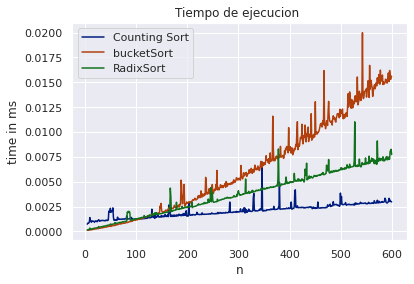

In [217]:
#CountingSort vs BucketSort vs RadixSort
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from timeit import repeat

%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='dark')

x=[]; x2 =[]; x3=[]
y=[]; y2=[];y3=[]

for n in range(5,600):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import counting_sort", stmt=f"counting_sort({a},{max(a)})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,600):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a},{10})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

for n in range(5,600):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x3.append(n)
  y3.append(t)


plt.plot(x,y)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.legend(["Counting Sort", "bucketSort", "RadixSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Tiempo de ejecucion ')
plt.show()

El tiempo de ejecución parece ser mayor para el algoritmo bucketSort. Sin embargo, esto puedo variar segun la cantidad de buckets seleccionados

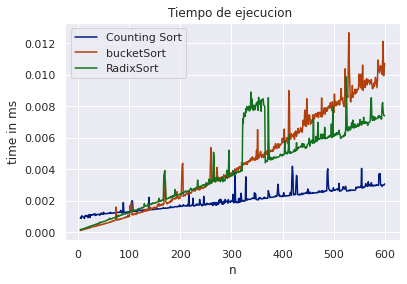

In [226]:
#CountingSort vs BucketSort vs RadixSort
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from timeit import repeat

%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='dark')

x=[]; x2 =[]; x3=[]
y=[]; y2=[];y3=[]

for n in range(5,600):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import counting_sort", stmt=f"counting_sort({a},{max(a)})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,600):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a},{20})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

for n in range(5,600):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x3.append(n)
  y3.append(t)


plt.plot(x,y)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.legend(["Counting Sort", "bucketSort", "RadixSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Tiempo de ejecucion ')
plt.show()

Se nota una disminución considerable en el tiempo de ejecución para bucketsort utilizando 20 buckets en lugar de 10.